In [1]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# data
flibe_sp = openmc.StatePoint('statepoint_flibe.100.h5')
cllif_sp = openmc.StatePoint('statepoint_cllif.100.h5')
flinak_sp = openmc.StatePoint('statepoint_flinak.100.h5')
pbli_sp = openmc.StatePoint('statepoint_pbli.100.h5')

sp = [flibe_sp, cllif_sp, flinak_sp, pbli_sp]

In [3]:
tbr_li6_mean = np.array([s.get_tally(name='salt_cell_tbr').mean.squeeze()[0] for s in sp])
tbr_li7_mean = np.array([s.get_tally(name='salt_cell_tbr').mean.squeeze()[1] for s in sp])
tbr_tot_mean = np.array([s.get_tally(name='salt_cell_tbr2').mean.squeeze() for s in sp])

[3.06642923e-04 4.60802233e-04 1.76217887e-04 6.89262250e-05]


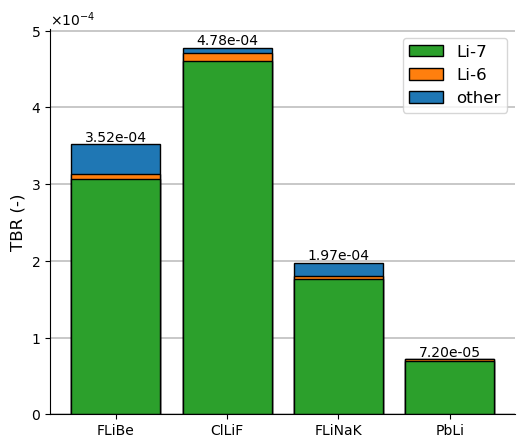

In [4]:
x = np.arange(4)
breeders = ['FLiBe', 'ClLiF', 'FLiNaK', 'PbLi']

print(tbr_li7_mean)

fig, ax = plt.subplots(figsize=(6, 5))
tot = ax.bar(x, tbr_tot_mean, edgecolor='k', label='other')
li6 = ax.bar(x, tbr_li6_mean+tbr_li7_mean, edgecolor='k', label='Li-6')
li7 = ax.bar(x, tbr_li7_mean, edgecolor='k', label='Li-7')
ax.set_xticks(x)
ax.set_xticklabels(breeders)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha=.5, lw=1.2)
ax.set_ylabel('TBR (-)', fontsize=12)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
for bar in tot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, "{:.2e}".format(yval),
             ha='center', va='bottom', fontsize=10, color='black')
plt.savefig('tbr_chart.pdf')
plt.show()